<a href="https://colab.research.google.com/github/Zidansky666/portofolio/blob/freecodecamp-task/health_costs_with_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

  Preparing metadata (setup.py) ... done
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

--2023-10-08 13:25:29--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.3.33, 172.67.70.149, 104.26.2.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.3.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv’

insurance.csv       100%[===================>]  49.09K  --.-KB/s    in 0.01s   

2023-10-08 13:25:29 (4.70 MB/s) - ‘insurance.csv’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [4]:
dataset.shape

(1338, 7)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


<Axes: >

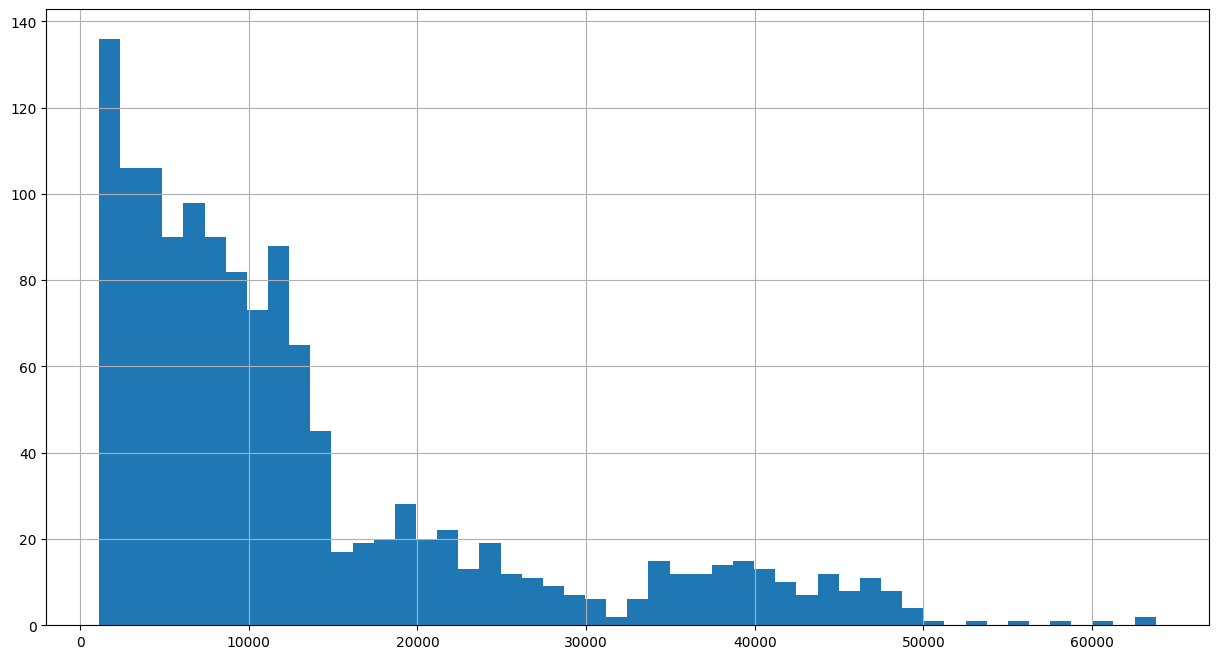

In [6]:
dataset.expenses.hist(bins=50, figsize=(15,8))

In [7]:
df = dataset
df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], prefix=['', 'smoker_', ''], prefix_sep='')
df.tail()

,age,bmi,children,expenses,female,male,smoker_no,smoker_yes,northeast,northwest,southeast,southwest
1333,50,31.0,3,10600.55,0,1,1,0,0,1,0,0
1334,18,31.9,0,2205.98,1,0,1,0,1,0,0,0
1335,18,36.9,0,1629.83,1,0,1,0,0,0,1,0
1336,21,25.8,0,2007.95,1,0,1,0,0,0,0,1
1337,61,29.1,0,29141.36,1,0,0,1,0,1,0,0


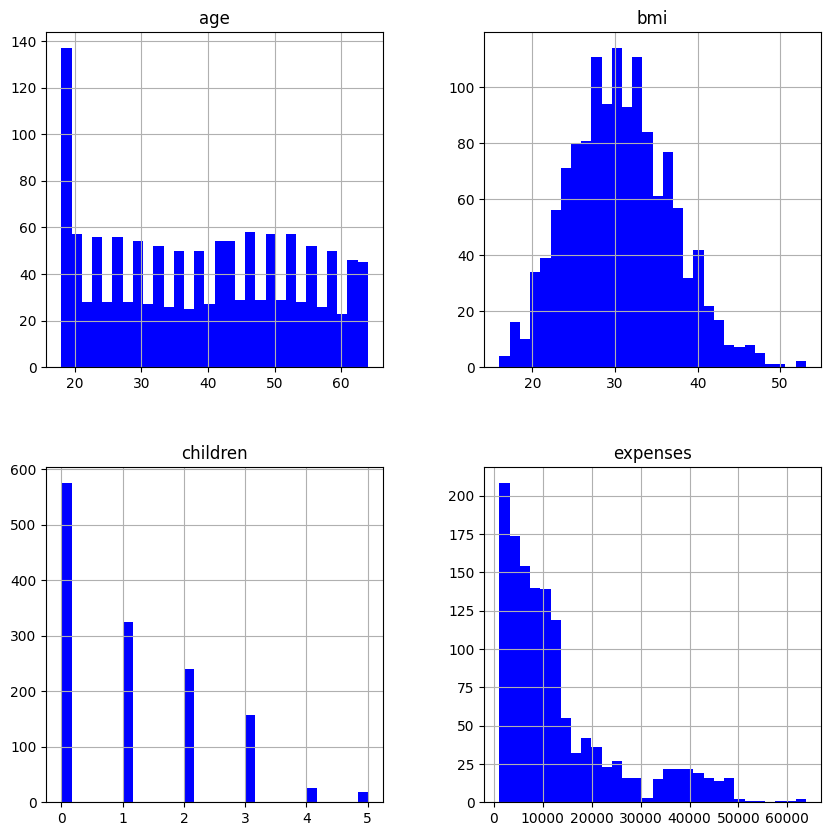

In [8]:
df[['age', 'bmi', 'children', 'expenses']].hist(bins=30, figsize=(10, 10), color='blue')
plt.show()

In [9]:
train_dataset = df.sample(frac = 0.8, random_state=0)
test_dataset = df.drop(train_dataset.index)

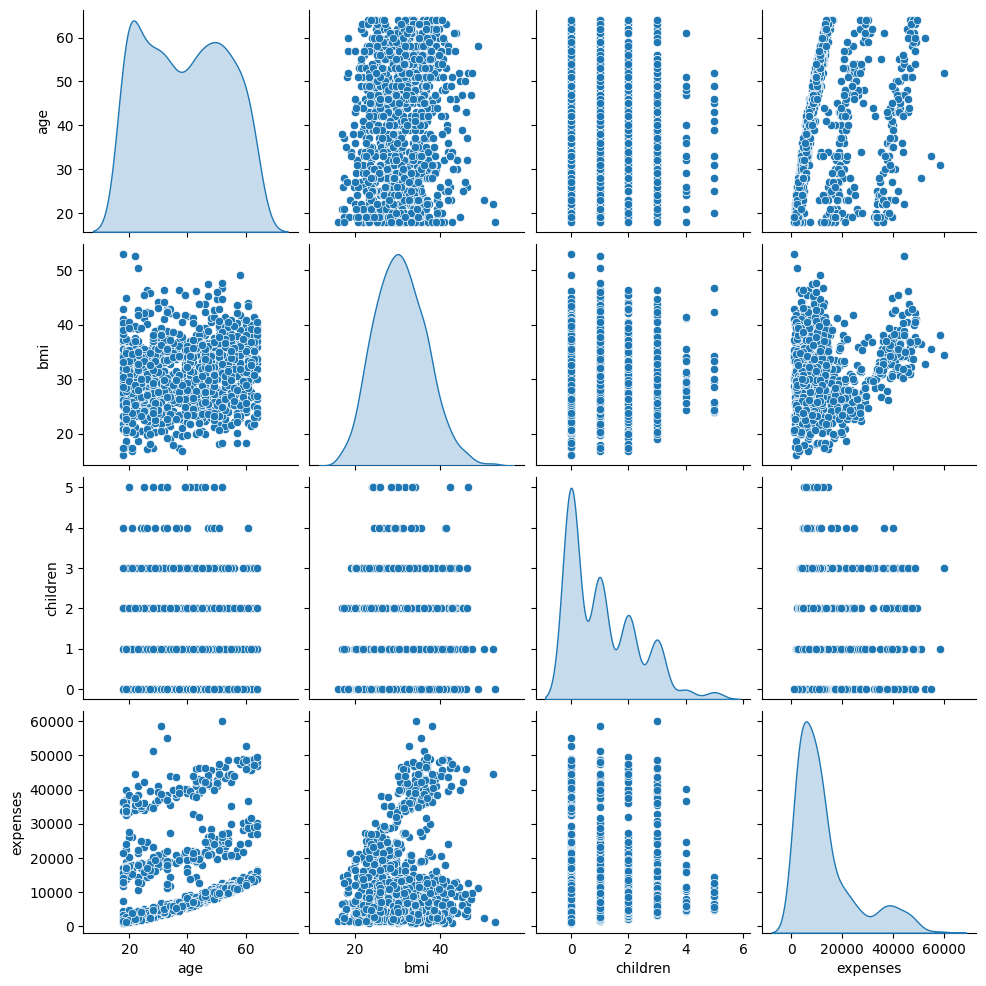

In [10]:
sns.pairplot(train_dataset[['age', 'bmi', 'children', 'expenses']], diag_kind='kde')

In [11]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1070.0,39.036449,14.142122,18.00,26.000,39.000,51.0000,64.0
bmi,1070.0,30.737290,6.065193,16.00,26.300,30.500,34.8000,53.1
children,1070.0,1.093458,1.211364,0.00,0.000,1.000,2.0000,5.0
expenses,1070.0,13056.551654,11994.260172,1121.87,4565.995,9289.085,15826.1125,60021.4
female,1070.0,0.501869,0.500230,0.00,0.000,1.000,1.0000,1.0
male,1070.0,0.498131,0.500230,0.00,0.000,0.000,1.0000,1.0
smoker_no,1070.0,0.800935,0.399484,0.00,1.000,1.000,1.0000,1.0
smoker_yes,1070.0,0.199065,0.399484,0.00,0.000,0.000,0.0000,1.0
northeast,1070.0,0.248598,0.432402,0.00,0.000,0.000,0.0000,1.0
northwest,1070.0,0.235514,0.424518,0.00,0.000,0.000,0.0000,1.0


In [12]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()
train_labels = train_features.pop('expenses')
test_labels = test_features.pop('expenses')
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
age,39.036449,14.142122
bmi,30.737290,6.065193
children,1.093458,1.211364
expenses,13056.551654,11994.260172
female,0.501869,0.500230
male,0.498131,0.500230
smoker_no,0.800935,0.399484
smoker_yes,0.199065,0.399484
northeast,0.248598,0.432402
northwest,0.235514,0.424518


In [13]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))

In [14]:
print(normalizer.mean.numpy())

[[39.036446   30.737288    1.093458    0.50186914  0.49813083  0.8009347
   0.19906542  0.24859811  0.23551399  0.28130844  0.23457943]]


In [15]:
def build_and_compile_model(norm):
    model = keras.Sequential([
        norm,
        layers.Dense(32, activation = 'relu'),
        layers.Dense(128, activation = 'relu'),
        layers.Dense(128, activation = 'relu'),
        layers.Flatten(),
        layers.Dropout(0.8),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.4),
        layers.Dense(1)
    ])
    model.compile(
    loss='mean_squared_error',  # Change the loss function to MSE
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=['mae', 'mse']
)
    return model


In [16]:
model = build_and_compile_model(normalizer)
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizati  (None, 11)                23        
 on)                                                             
                                                                 
 dense (Dense)               (None, 32)                384       
                                                                 
 dense_1 (Dense)             (None, 128)               4224      
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 flatten (Flatten)           (None, 128)               0         
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                        

In [17]:
history = model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0,
    epochs=300
)

In [18]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Error [expenses]')
    plt.legend()
    plt.grid(True)

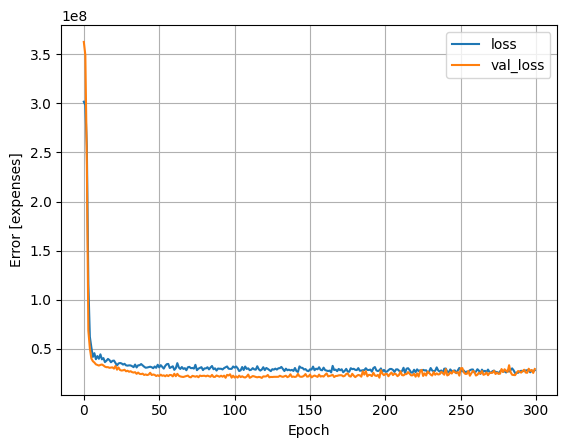

In [19]:
plot_loss(history)

In [20]:
model = model
test_dataset = test_features

9/9 - 0s - loss: 42773504.0000 - mae: 3329.0530 - mse: 42773504.0000 - 41ms/epoch - 5ms/step
Testing set Mean Abs Error: 3329.05 expenses
You passed the challenge. Great job!
9/9 [==============================] - 0s 2ms/step


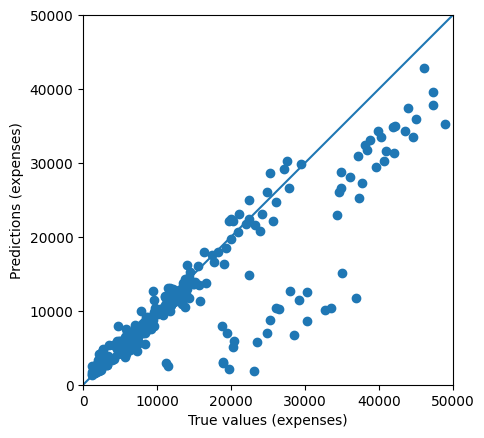

In [21]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
